Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


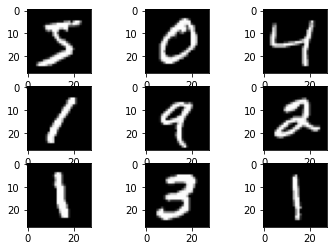

In [17]:
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [28]:
from keras.utils import np_utils

In [18]:
trainX.shape

(60000, 28, 28)

In [19]:
trainX = trainX.reshape((trainX.shape[0], 28*28)).astype('float32')
trainy = trainy.astype('float32')
testX = testX.reshape((testX.shape[0], 28*28)).astype('float32')
testy = testy.astype('float32')

In [27]:
trainy.shape

(60000,)

In [20]:
trainX = trainX/255
testX = testX/255

In [29]:
trainy = np_utils.to_categorical(trainy)
testy = np_utils.to_categorical(testy)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [167]:
model = Sequential()
model.add(layers.Dense(32,input_dim=28*28,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
#model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [168]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [169]:
history = model.fit(trainX,trainy,epochs=20,batch_size=100)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4001 - accuracy: 0.8845
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1799 - accuracy: 0.9471
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1425 - accuracy: 0.9581
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1179 - accuracy: 0.9653
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1026 - accuracy: 0.9701
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0907 - accuracy: 0.9726
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0810 - accuracy: 0.9756
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0716 - accuracy: 0.9786
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0654 - accuracy: 0.9798
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0595 - accuracy: 0.9815

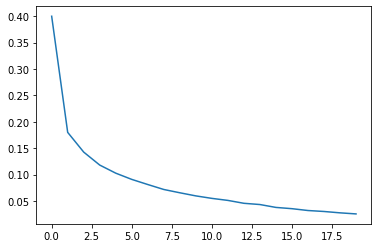

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'],label='loss')
plt.show()

In [171]:
prediction= model.predict(testX)

In [172]:
prediction.shape

(10000, 10)

In [173]:
testy.shape

(10000, 10)

In [174]:
prediction

array([[1.0916203e-08, 5.8502292e-12, 1.2007349e-07, ..., 9.9999976e-01,
        2.5794619e-10, 6.5773520e-08],
       [3.7679416e-16, 1.0979403e-06, 9.9999893e-01, ..., 6.7006487e-17,
        1.1800152e-13, 1.2345581e-19],
       [9.4061001e-08, 9.9948609e-01, 2.1400871e-05, ..., 9.6908807e-05,
        3.7102186e-04, 1.3304289e-06],
       ...,
       [7.4234001e-18, 1.6006121e-12, 1.4022165e-16, ..., 1.2045211e-09,
        7.7001455e-14, 8.2678975e-09],
       [7.0644960e-13, 1.4015011e-12, 2.4322976e-12, ..., 8.1452493e-13,
        1.2482579e-06, 5.5213233e-14],
       [1.3372409e-13, 5.8089387e-18, 2.2111303e-13, ..., 1.4545508e-18,
        1.7981780e-13, 1.0998442e-16]], dtype=float32)

In [175]:
import numpy as np
pred_list = []

In [176]:
for i in prediction:
  pred_list.append(np.argmax(i))

In [177]:
def plot_(lst):
  d={}
  for i in range(10):
    d[i]=0
  for i in lst:
    d[i]+=1
  plt.plot(list(d.values()))

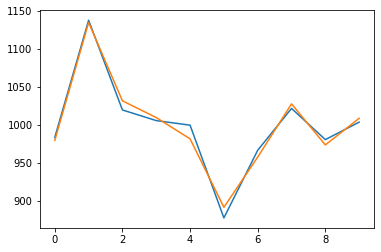

In [178]:
plot_(pred_list)
plot_(real_list)
plt.show()

In [179]:
real_list=[]
for i in testy:
  real_list.append(np.argmax(i))

In [180]:
from sklearn.metrics import confusion_matrix

In [181]:
confusion_matrix(y_true=real_list,y_pred=pred_list)

array([[ 961,    0,    2,    1,    0,    6,    4,    2,    3,    1],
       [   0, 1122,    2,    0,    0,    1,    4,    1,    5,    0],
       [   4,    2,  997,    6,    3,    0,    4,    6,    9,    1],
       [   1,    1,    5,  977,    1,    5,    0,    6,    7,    7],
       [   0,    1,    1,    0,  961,    1,    7,    0,    2,    9],
       [   2,    1,    0,   13,    1,  853,    7,    1,    9,    5],
       [   8,    4,    0,    0,    4,    4,  937,    0,    1,    0],
       [   0,    3,   11,    1,    4,    0,    0,  998,    3,    8],
       [   4,    0,    2,    4,    7,    4,    4,    6,  940,    3],
       [   4,    4,    0,    4,   19,    4,    0,    2,    2,  970]])

In [182]:
model.save('digit_classify_model.h5')

In [184]:
from google.colab import files

In [185]:
files.download('digit_classify_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [187]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpgd5c645e/assets


In [188]:
files.download('model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>